In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_theme()

### Limitaciones

- No se han tenido en cuenta los parciales no armónicos cercanos a la fundamental que tienen algunos instrumentos (p.ej. el trombón o el clave)
- No se ha tenido en cuenta el error en el ajuste entre los armónicos y el pitch que se les atribuye (muchos están muy cerca de 0%, pero algunos pocos están alrededor de 50%)
- El piccolo sólo tiene registrados 12 armónicos, aunque aparece en los gráficos hay que considerarlo como una flauta aguda


In [5]:
harmonics = {
 "flute": [  -11.0,  -3.0,  -11.0,  -2.0,  0.0,  -16.0,  -6.0,  -6.0,  -17.0,  -17.0,  -24.0,  -16.0,  -18.0,  -23.0,  -23.0,  -24.0,  -27.0,  -30.0,  -32.0,  -30.0,  -34.0,  -36.0,  -35.0,  -37.0,  -36.0,  -39.0,  -40.0,  -36.0,  -42.0,  -40.0 ],
 "piccolo": [  0.0,  -2.0,  -11.0,  -13.0,  -26.0,  -28.0,  -35.0,  -36.0,  -42.0,  -45.0,  -52.0,  -55.0,  -50,  -50,  -50,  -50,  -50,  -50,  -50,  -50,  -50,  -50,  -50,  -50,  -50,  -50,  -50,  -50,  -50,  -50 ],
 "violin": [  -5.0,  0.0,  -9.0,  -19.0,  -18.0,  -6.0,  -7.0,  -9.0,  -10.0,  -22.0,  -18.0,  -16.0,  -27.0,  -21.0,  -25.0,  -26.0,  -23.0,  -28.0,  -32.0,  -28.0,  -37.0,  -40.0,  -45.0,  -37.0,  -31.0,  -37.0,  -43.0,  -43.0,  -43.0,  -43.0 ],
 "viola": [  -7.0,  -7.0,  0.0,  -7.0,  -9.0,  -11.0,  -4.0,  -1.0,  -13.0,  -9.0,  -14.0,  -13.0,  -21.0,  -15.0,  -22.0,  -23.0,  -24.0,  -29.0,  -19.0,  -29.0,  -29.0,  -30.0,  -34.0,  -34.0,  -34.0,  -34.0,  -34.0,  -37.0,  -38.0,  -39.0 ],
 "cello": [  -7.0,  -6.0,  0.0,  -4.0,  0.0,  -2.0,  -12.0,  -7.0,  -17.0,  -9.0,  -17.0,  -17.0,  -13.0,  -17.0,  -20.0,  -24.0,  -29.0,  -26.0,  -32.0,  -24.0,  -26.0,  -25.0,  -21.0,  -23.0,  -26.0,  -29.0,  -30.0,  -29.0,  -28.0,  -28.0 ],
 "contrabass": [  0.0,  -2.0,  -1.0,  -4.0,  -5.0,  -6.0,  -5.0,  -14.0,  -3.0,  -7.0,  -7.0,  -6.0,  -7.0,  -18.0,  -13.0,  -11.0,  -15.0,  -17.0,  -22.0,  -19.0,  -19.0,  -21.0,  -15.0,  -26.0,  -24.0,  -22.0,  -26.0,  -25.0,  -23.0,  -23.0 ],
 "clarinet": [  -6.0,  -28.0,  0.0,  -10.0,  -13.0,  -3.0,  -14.0,  -28.0,  -17.0,  -9.0,  -12.0,  -21.0,  -23.0,  -45.0,  -33.0,  -32.0,  -35.0,  -32.0,  -37.0,  -47.0,  -52.0,  -47.0,  -54.0,  -53.0,  -59.0,  -49.0,  -51.0,  -52.0,  -61.0,  -60.0 ],
 "bass clarinet": [  -12.0,  -19.0,  -8.0,  -25.0,  -10.0,  -29.0,  -16.0,  -22.0,  -15.0,  -19.0,  -28.0,  -15.0,  -15.0,  0.0,  -15.0,  -10.0,  -14.0,  -24.0,  -25.0,  -27.0,  -32.0,  -26.0,  -31.0,  -25.0,  -24.0,  -26.0,  -32.0,  -22.0,  -29.0,  -27.0 ],
 "oboe": [  -12.0,  -9.0,  -9.0,  0.0,  0.0,  -1.0,  -4.0,  -7.0,  -9.0,  -5.0,  -7.0,  -3.0,  -12.0,  -14.0,  -10.0,  -17.0,  -25.0,  -26.0,  -34.0,  -37.0,  -27.0,  -28.0,  -30.0,  -27.0,  -29.0,  -32.0,  -37.0,  -34.0,  -33.0,  -39.0 ],
 "bassoon": [  -17.0,  0.0,  -6.0,  -9.0,  -7.0,  -13.0,  -35.0,  -29.0,  -36.0,  -37.0,  -32.0,  -30.0,  -24.0,  -31.0,  -30.0,  -36.0,  -34.0,  -43.0,  -42.0,  -39.0,  -44.0,  -49.0,  -43.0,  -45.0,  -43.0,  -52.0,  -41.0,  -46.0,  -48.0,  -49.0 ],
 "english horn": [  -19.0,  -23.0,  -7.0,  0.0,  -2.0,  -12.0,  -8.0,  -12.0,  -13.0,  -22.0,  -32.0,  -31.0,  -25.0,  -26.0,  -28.0,  -30.0,  -44.0,  -37.0,  -38.0,  -33.0,  -36.0,  -37.0,  -40.0,  -36.0,  -36.0,  -42.0,  -45.0,  -44.0,  -44.0,  -46.0 ],
 "french horn": [  0.0,  -3.0,  -3.0,  -2.0,  -12.0,  -11.0,  -10.0,  -7.0,  -4.0,  -12.0,  -13.0,  -17.0,  -14.0,  -19.0,  -23.0,  -19.0,  -20.0,  -31.0,  -24.0,  -34.0,  -34.0,  -30.0,  -33.0,  -42.0,  -38.0,  -41.0,  -53.0,  -46.0,  -37.0,  -40.0 ],
 "trumpet": [  -13.0,  -10.0,  -5.0,  -1.0,  0.0,  -1.0,  -2.0,  -7.0,  -6.0,  -9.0,  -13.0,  -13.0,  -21.0,  -24.0,  -24.0,  -27.0,  -26.0,  -27.0,  -33.0,  -31.0,  -30.0,  -34.0,  -38.0,  -40.0,  -41.0,  -42.0,  -43.0,  -46.0,  -52.0,  -51.0 ],
 "trombone": [  -8.0,  -1.0,  0.0,  -2.0,  -2.0,  -3.0,  -7.0,  -10.0,  -12.0,  -17.0,  -22.0,  -24.0,  -27.0,  -30.0,  -31.0,  -36.0,  -37.0,  -39.0,  -42.0,  -46.0,  -48.0,  -50.0,  -53.0,  -56.0,  -60.0,  -64.0,  -67.0,  -71.0,  -71.0,  -71.0 ],
 "contrabass trombone": [  -6.0,  -5.0,  0.0,  -3.0,  -4.0,  -1.0,  -2.0,  -2.0,  -6.0,  -8.0,  -10.0,  -13.0,  -15.0,  -18.0,  -21.0,  -24.0,  -27.0,  -29.0,  -30.0,  -33.0,  -31.0,  -34.0,  -38.0,  -38.0,  -40.0,  -44.0,  -46.0,  -48.0,  -50.0,  -50.0 ],
 "tuba": [  -8.0,  0.0,  -1.0,  -3.0,  -9.0,  -13.0,  -17.0,  -23.0,  -18.0,  -26.0,  -34.0,  -36.0,  -35.0,  -40.0,  -47.0,  -47.0,  -45.0,  -46.0,  -46.0,  -47.0,  -51.0,  -53.0,  -54.0,  -58.0,  -57.0,  -57.0,  -60.0,  -60.0,  -60.0,  -62.0 ],
 "contrabass tuba": [  -27.0,  -13.0,  -8.0,  -5.0,  -2.0,  -3.0,  -2.0,  0.0,  -2.0,  -3.0,  -2.0,  -2.0,  -2.0,  -3.0,  -6.0,  -5.0,  -3.0,  -4.0,  -4.0,  -10.0,  -15.0,  -13.0,  -12.0,  -13.0,  -14.0,  -15.0,  -15.0,  -15.0,  -15.0,  -16.0 ],
 "harpsichord": [  0.0,  -4.0,  -5.0,  -7.0,  -11.0,  -21.0,  -19.0,  -13.0,  -1.0,  -21.0,  -35.0,  -13.0,  -10.0,  -16.0,  -20.0,  -33.0,  -32.0,  -24.0,  -20.0,  -24.0,  -25.0,  -41.0,  -35.0,  -36.0,  -24.0,  -28.0,  -48.0,  -50.0,  -41.0,  -46.0 ],
 "harmonic": [  1,  2,  3,  4,  5,  6,  7,  8,  9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30 ]
}

In [6]:
df = pd.DataFrame(harmonics)
df.index = df['harmonic']
del df['harmonic']

### Corrección del tilt de 3dB/octava en la medición con Fabfilter Pro Q3

In [7]:
df = df.apply(lambda db: db - 3*np.log2(db.index))

### Intensidad de armónicos

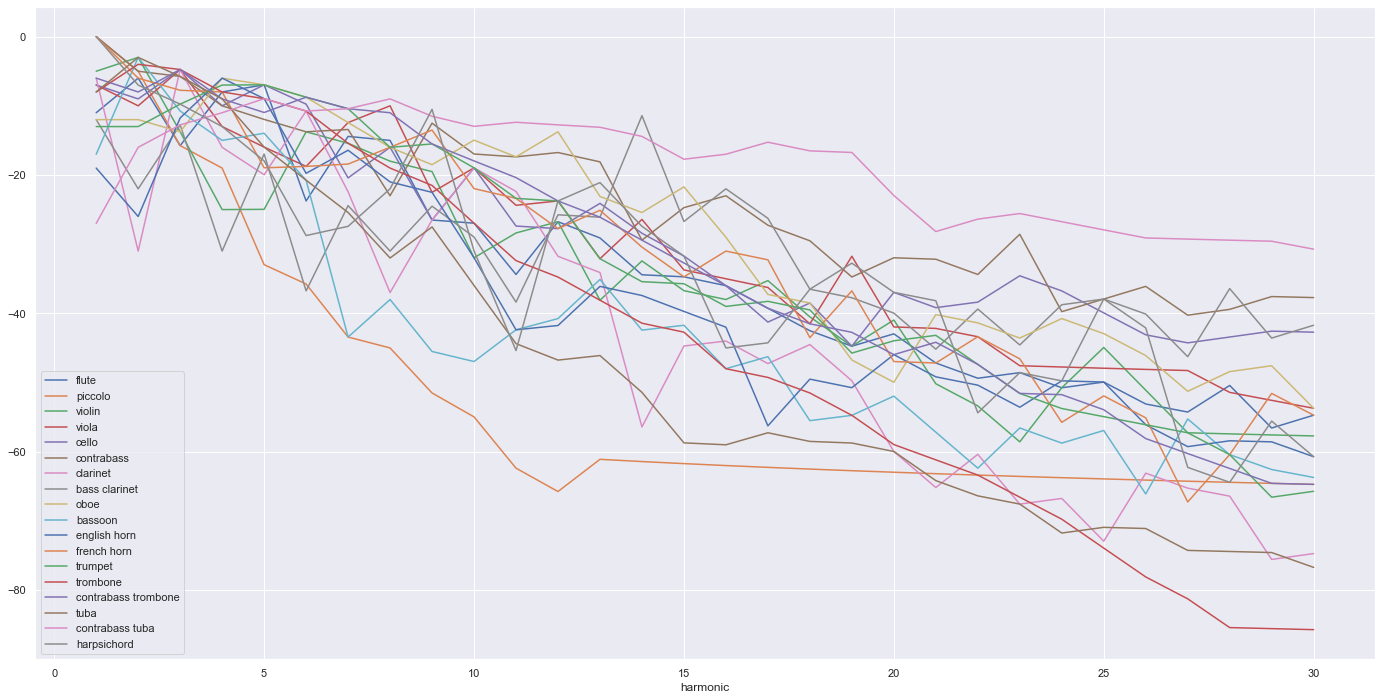

In [8]:
_= df.plot(figsize=(24,12))

### Media ponderada de los armónicos

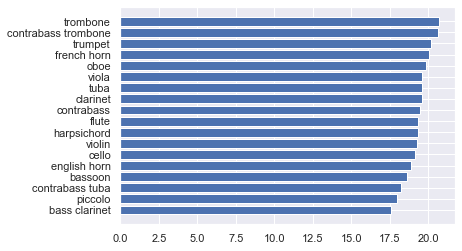

In [9]:
def weighted_average(df):
    x = {}
    
    for c in df.columns:
        x[c] = (df[c] * df.index).sum() / df[c].sum()
        
    return pd.Series(x)

sorted = weighted_average(df).sort_values()

_= plt.barh(sorted.index, sorted)

### Distancia entre la fundamental y el armónico más intenso

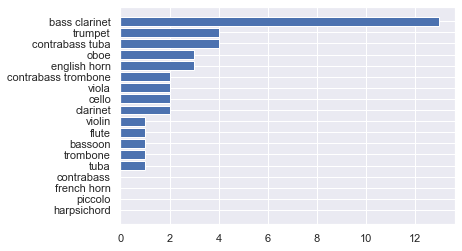

In [10]:
def fundamental_to_greatest_harmonic_distance(df):
    x = {}
    
    for c in df.columns:
        max = df[c].max()
        x[c] = df.loc[df[c] == max].index[0] - 1
        
    return pd.Series(x)
    

sorted = fundamental_to_greatest_harmonic_distance(df).sort_values()

_= plt.barh(sorted.index, sorted)

### Intensidad de los armónicos agrupados según su pitch-class

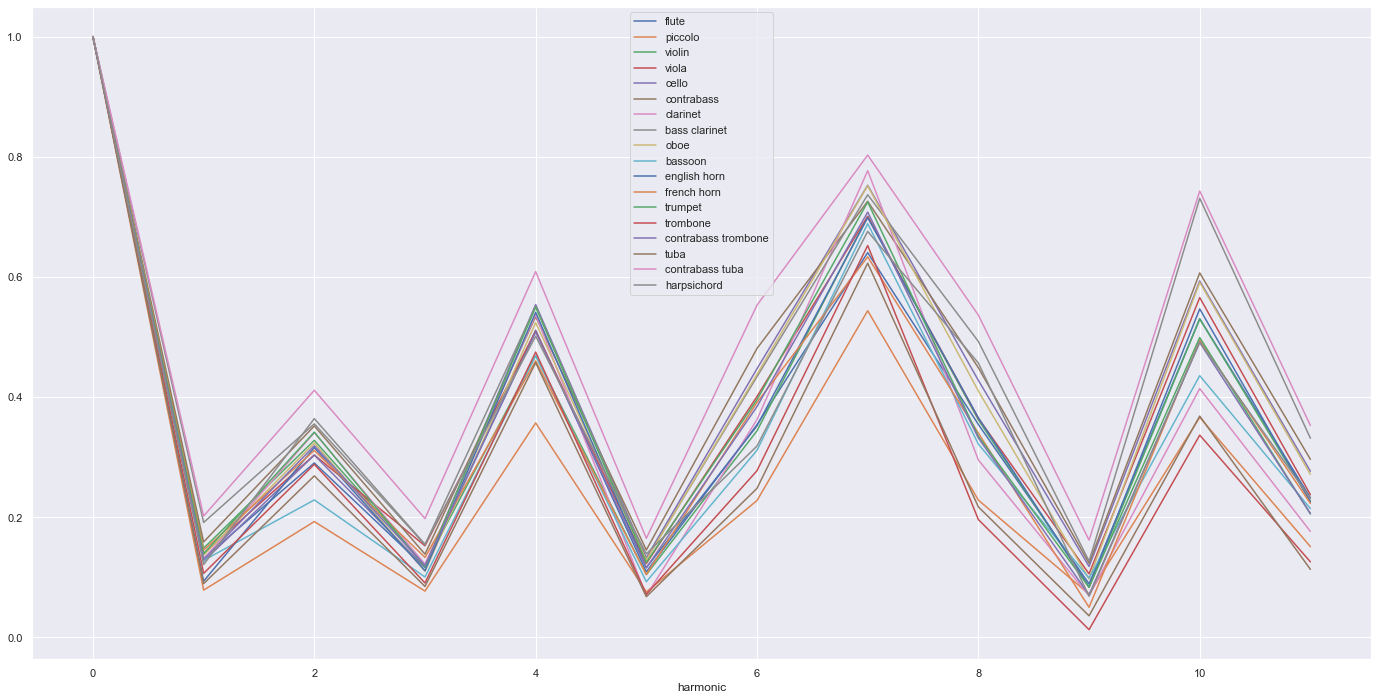

In [11]:
def relative_pitch_of_partial(partial):
    pitch = np.log2(np.power(partial, 12))  
    return np.round(pitch) % 12 # Dejamos de lado el % de error en el pitch: np.abs(pitch - np.round(pitch))

def pitch_class_relative_strength(df):
    x = {}
    xx = {}
    offset = -df.min().min()
    
    for c in df.columns:
        x[c] = (offset + df[c]).groupby(relative_pitch_of_partial(df.index)).sum()
        max = x[c].max()
        
        # OJO: este ratio pierde la información relativa a si los armónicos son 
        # más fuertes o menos en comparación con otros instrumentos; 
        # sólo permite comparar la estructura interna dentro del instrumento
        
        xx[c] = x[c] / max 
        # xx[c] = x[c] # / max 
        
    return pd.DataFrame(xx)

strength = pitch_class_relative_strength(df)

_= strength.plot(figsize=(24,12))


### Promedio de las intensidades de los armónicos agrupados por pitch-class

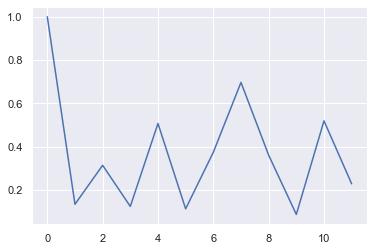

In [12]:
_= plt.plot(strength.T.mean())

### Pitch-class promedio ponderado

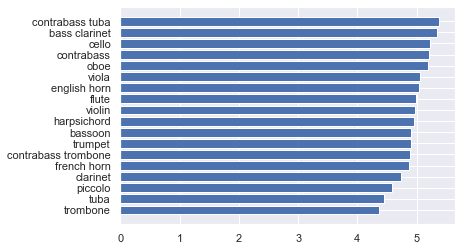

In [13]:
sorted = weighted_average(strength).sort_values()

_= plt.barh(sorted.index, sorted)

### Consonancia-disonancia interna según agrupación de las intensidades de los pitch-class y su ponderación por consonancia

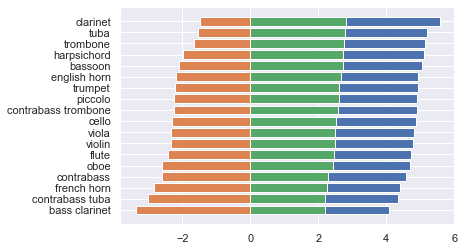

In [29]:
#                       U  2m  2M  3m    3M   4  TT   5  6m  6M  7m  7M
consonance = pd.Series([2, -2, -1,  1,  1.5,  1, -2,  2,  1,  1, -1, -2], index = np.arange(12.0))
#consonance = pd.Series([2, -1, -1,  1,  2,  1, -1,  2,  1,  1, -1, -1], index = np.arange(12.0))

consonance_weighted = strength.multiply(consonance, axis=0).sum().sort_values()
only_consonance_weighted = strength.multiply(consonance.loc[consonance > 0], axis=0).sum().sort_values()
only_dissonance_weighted = strength.multiply(consonance.loc[consonance < 0], axis=0).sum().sort_values()

_= plt.barh(consonance_weighted.index, only_consonance_weighted)
_= plt.barh(consonance_weighted.index, only_dissonance_weighted)


_= plt.barh(consonance_weighted.index, consonance_weighted)



In [26]:
consonance_weighted

french horn            2.789541
piccolo                2.881166
bass clarinet          2.886140
flute                  2.922391
contrabass             2.947320
violin                 2.963589
viola                  3.010279
oboe                   3.013107
contrabass tuba        3.013295
trombone               3.016495
tuba                   3.020890
contrabass trombone    3.032444
trumpet                3.078198
english horn           3.081482
cello                  3.107342
bassoon                3.141854
harpsichord            3.145299
clarinet               3.222790
dtype: float64